In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('books_data.csv', sep=',', header=0)

data.head()

,Title,Price,Availability,Rating,category
0,A Light in the Attic,Â£51.77,In stock,Three,Poetry
1,Tipping the Velvet,Â£53.74,In stock,One,Historical Fiction
2,Soumission,Â£50.10,In stock,One,Fiction
3,Sharp Objects,Â£47.82,In stock,Four,Mystery
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five,History


In [3]:
data['Price'] = data['Price'].replace({'Â£': '', '£': ''}, regex=True).astype(float)

rating_mapping = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
data['Rating'] = data['Rating'].replace(rating_mapping)

print(data.isnull().sum())

Title           0
Price           0
Availability    0
Rating          0
category        0
dtype: int64


C:\Users\Mariem\AppData\Local\Temp\ipykernel_9868\68150777.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Rating'] = data['Rating'].replace(rating_mapping)


In [4]:
data.head()

,Title,Price,Availability,Rating,category
0,A Light in the Attic,51.77,In stock,3,Poetry
1,Tipping the Velvet,53.74,In stock,1,Historical Fiction
2,Soumission,50.10,In stock,1,Fiction
3,Sharp Objects,47.82,In stock,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,History


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         999 non-null    object 
 1   Price         999 non-null    float64
 2   Availability  999 non-null    object 
 3   Rating        999 non-null    int64  
 4   category      999 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


In [23]:
data.describe()

,Price,Rating
count,999.000000,999.000000
mean,35.093083,2.922923
std,14.436019,1.435684
min,10.000000,1.000000
25%,22.110000,2.000000
50%,36.000000,3.000000
75%,47.475000,4.000000
max,59.990000,5.000000


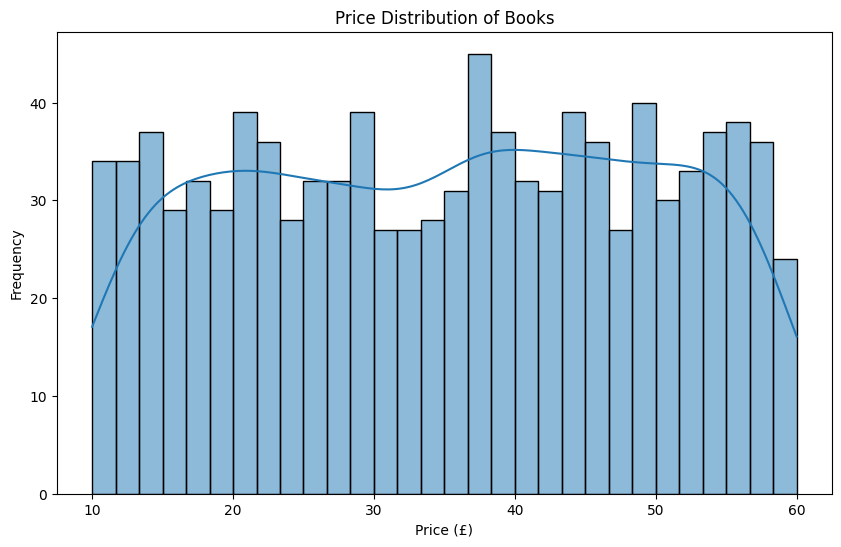

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution of Books')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

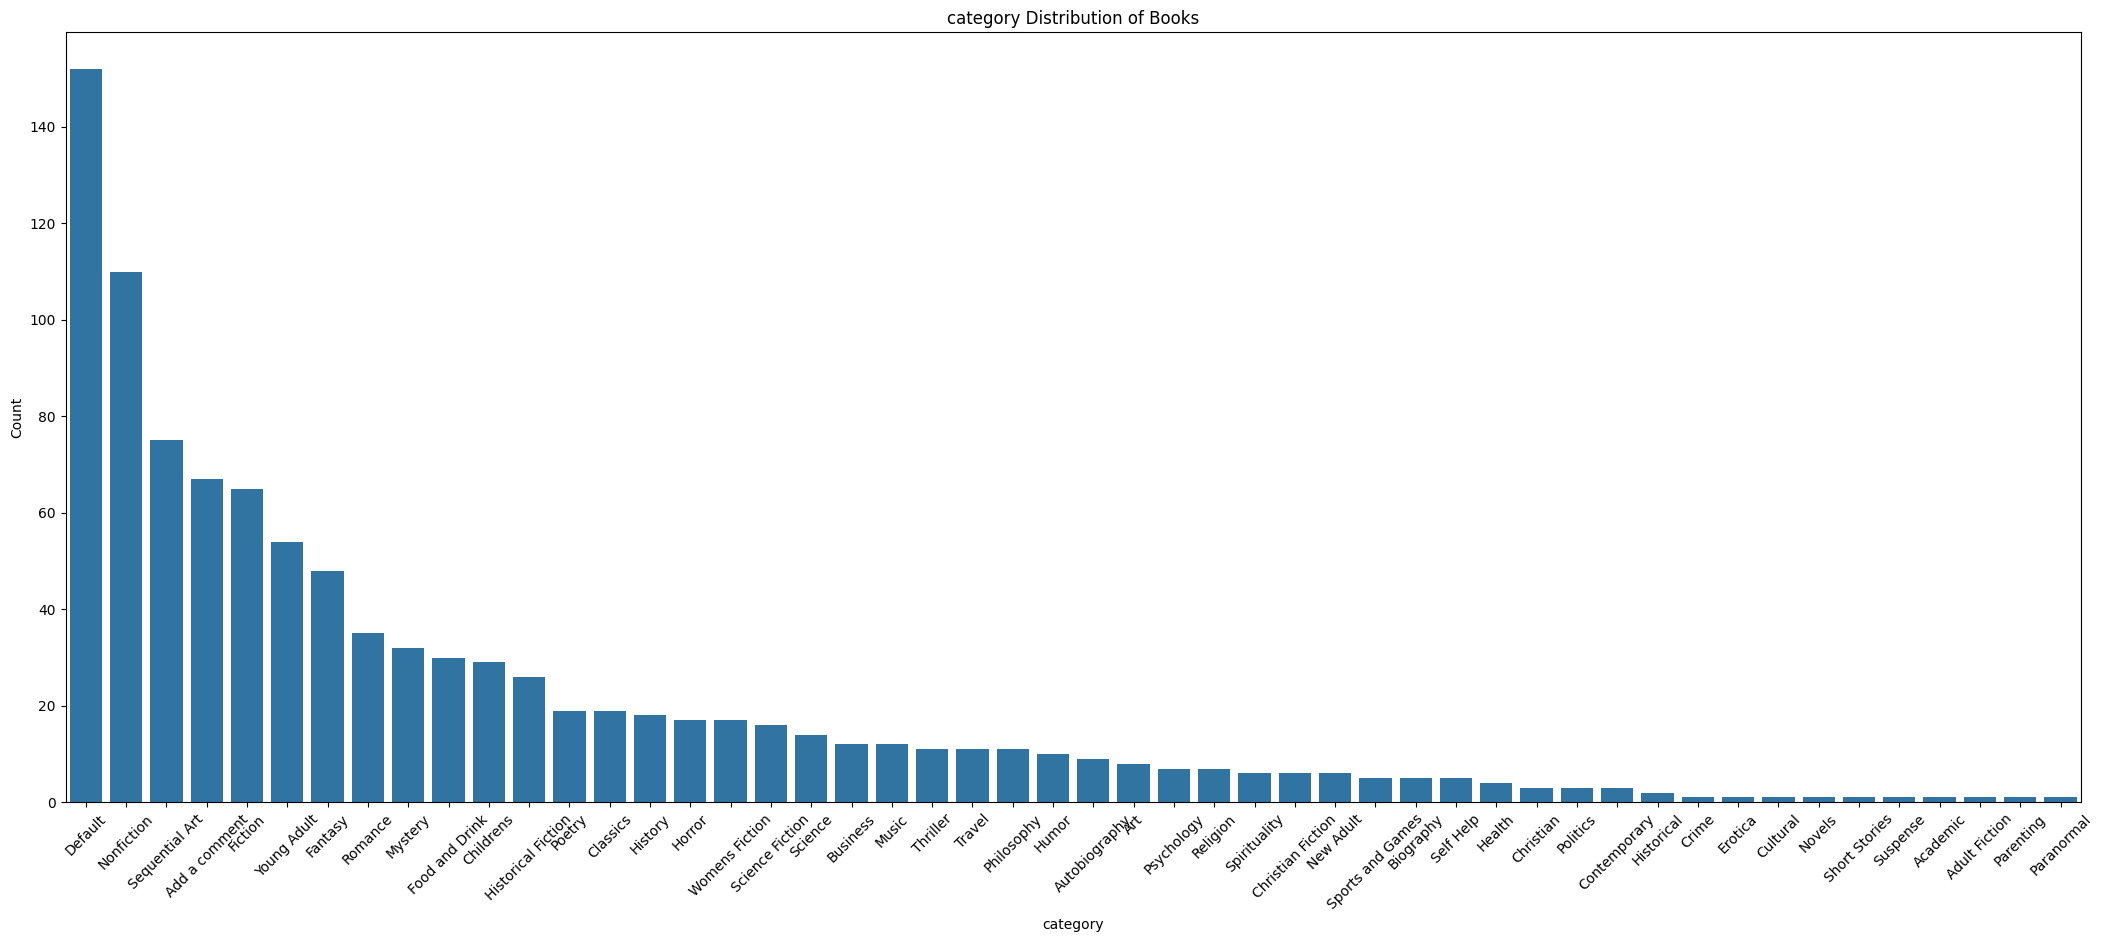

In [14]:

plt.figure(figsize=(26, 10))
sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
plt.title('category Distribution of Books')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

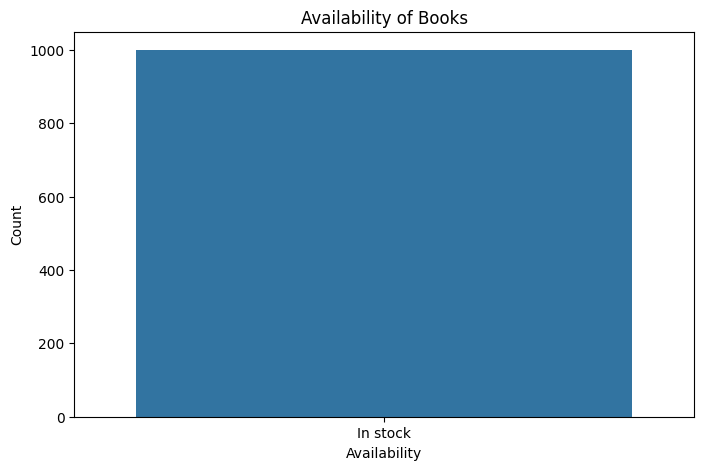

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Availability')
plt.title('Availability of Books')
plt.ylabel('Count')
plt.show()

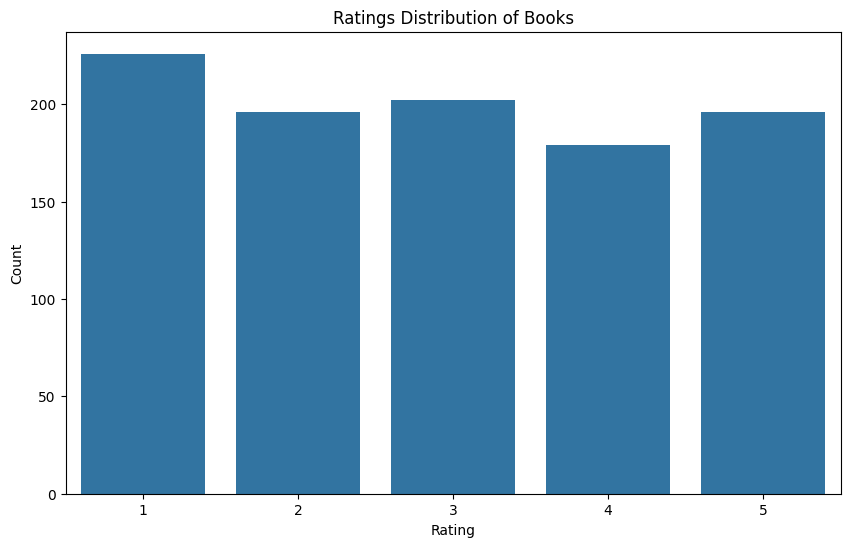

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rating')
plt.title('Ratings Distribution of Books')
plt.ylabel('Count')
plt.show()

C:\Users\Mariem\AppData\Local\Temp\ipykernel_9868\973301210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Rating', y='Price', palette='Set2')


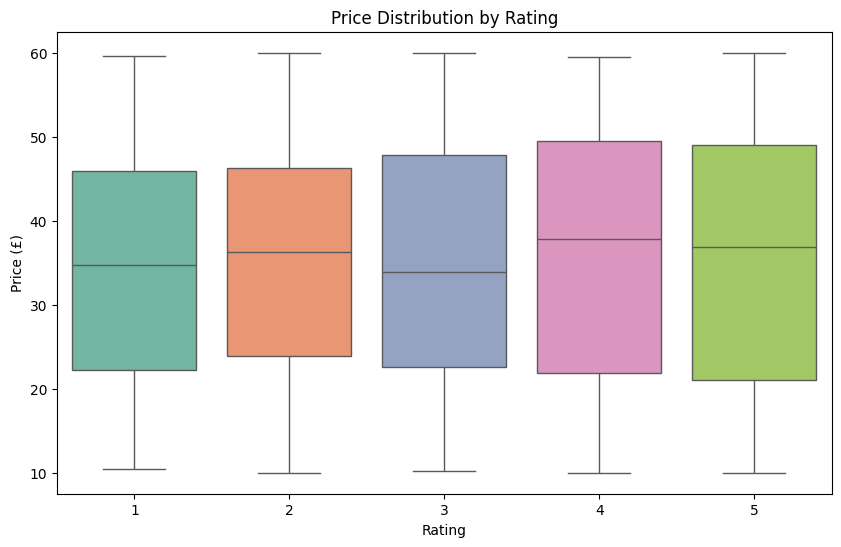

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Rating', y='Price', palette='Set2')
plt.title('Price Distribution by Rating')
plt.ylabel('Price (£)')
plt.xlabel('Rating')
plt.show()

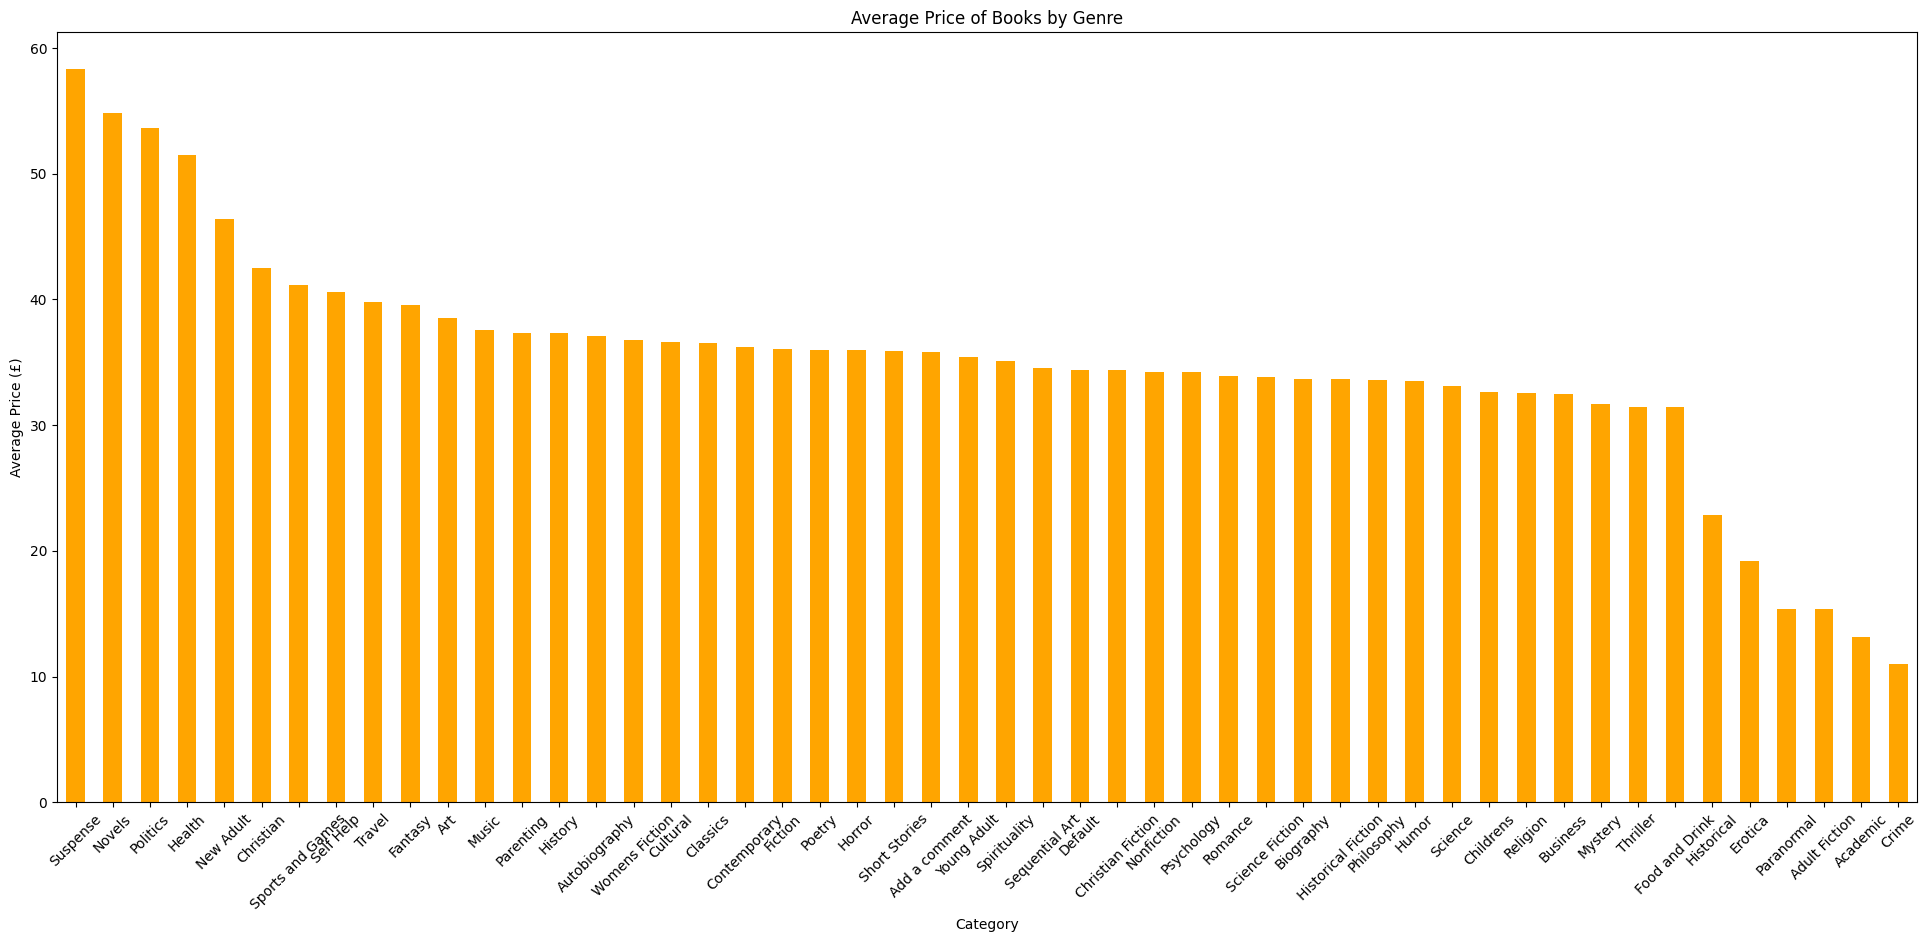

In [20]:
avg_price_by_genre = data.groupby('category')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(24, 10))
avg_price_by_genre.plot(kind='bar', color='orange')
plt.title('Average Price of Books by Genre')
plt.ylabel('Average Price (£)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

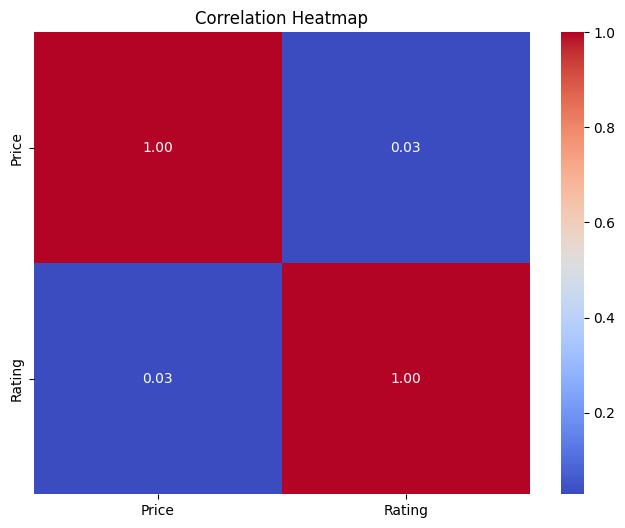

In [21]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Price', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()